# Utilising Monte Carlo simulation/Black-Scholes formula for AMZN call option pricing

### Since Amazon(AMZN) options follow the American style, Monte Carlo simulation is a more suitable pricing method. If they were European-style options, the Black-Scholes formula would be a better choice. For practice, this project will first use Monte Carlo simulation and subsequently the Black-Scholes formula.



### Here is the price of AMZN call option, with all the necessary data sourced from Yahoo Finance. The current price where AMZN is trading at is $230.37



### The option price we will be looking at for this project will be $250 strike price which expires on 2026-01-16

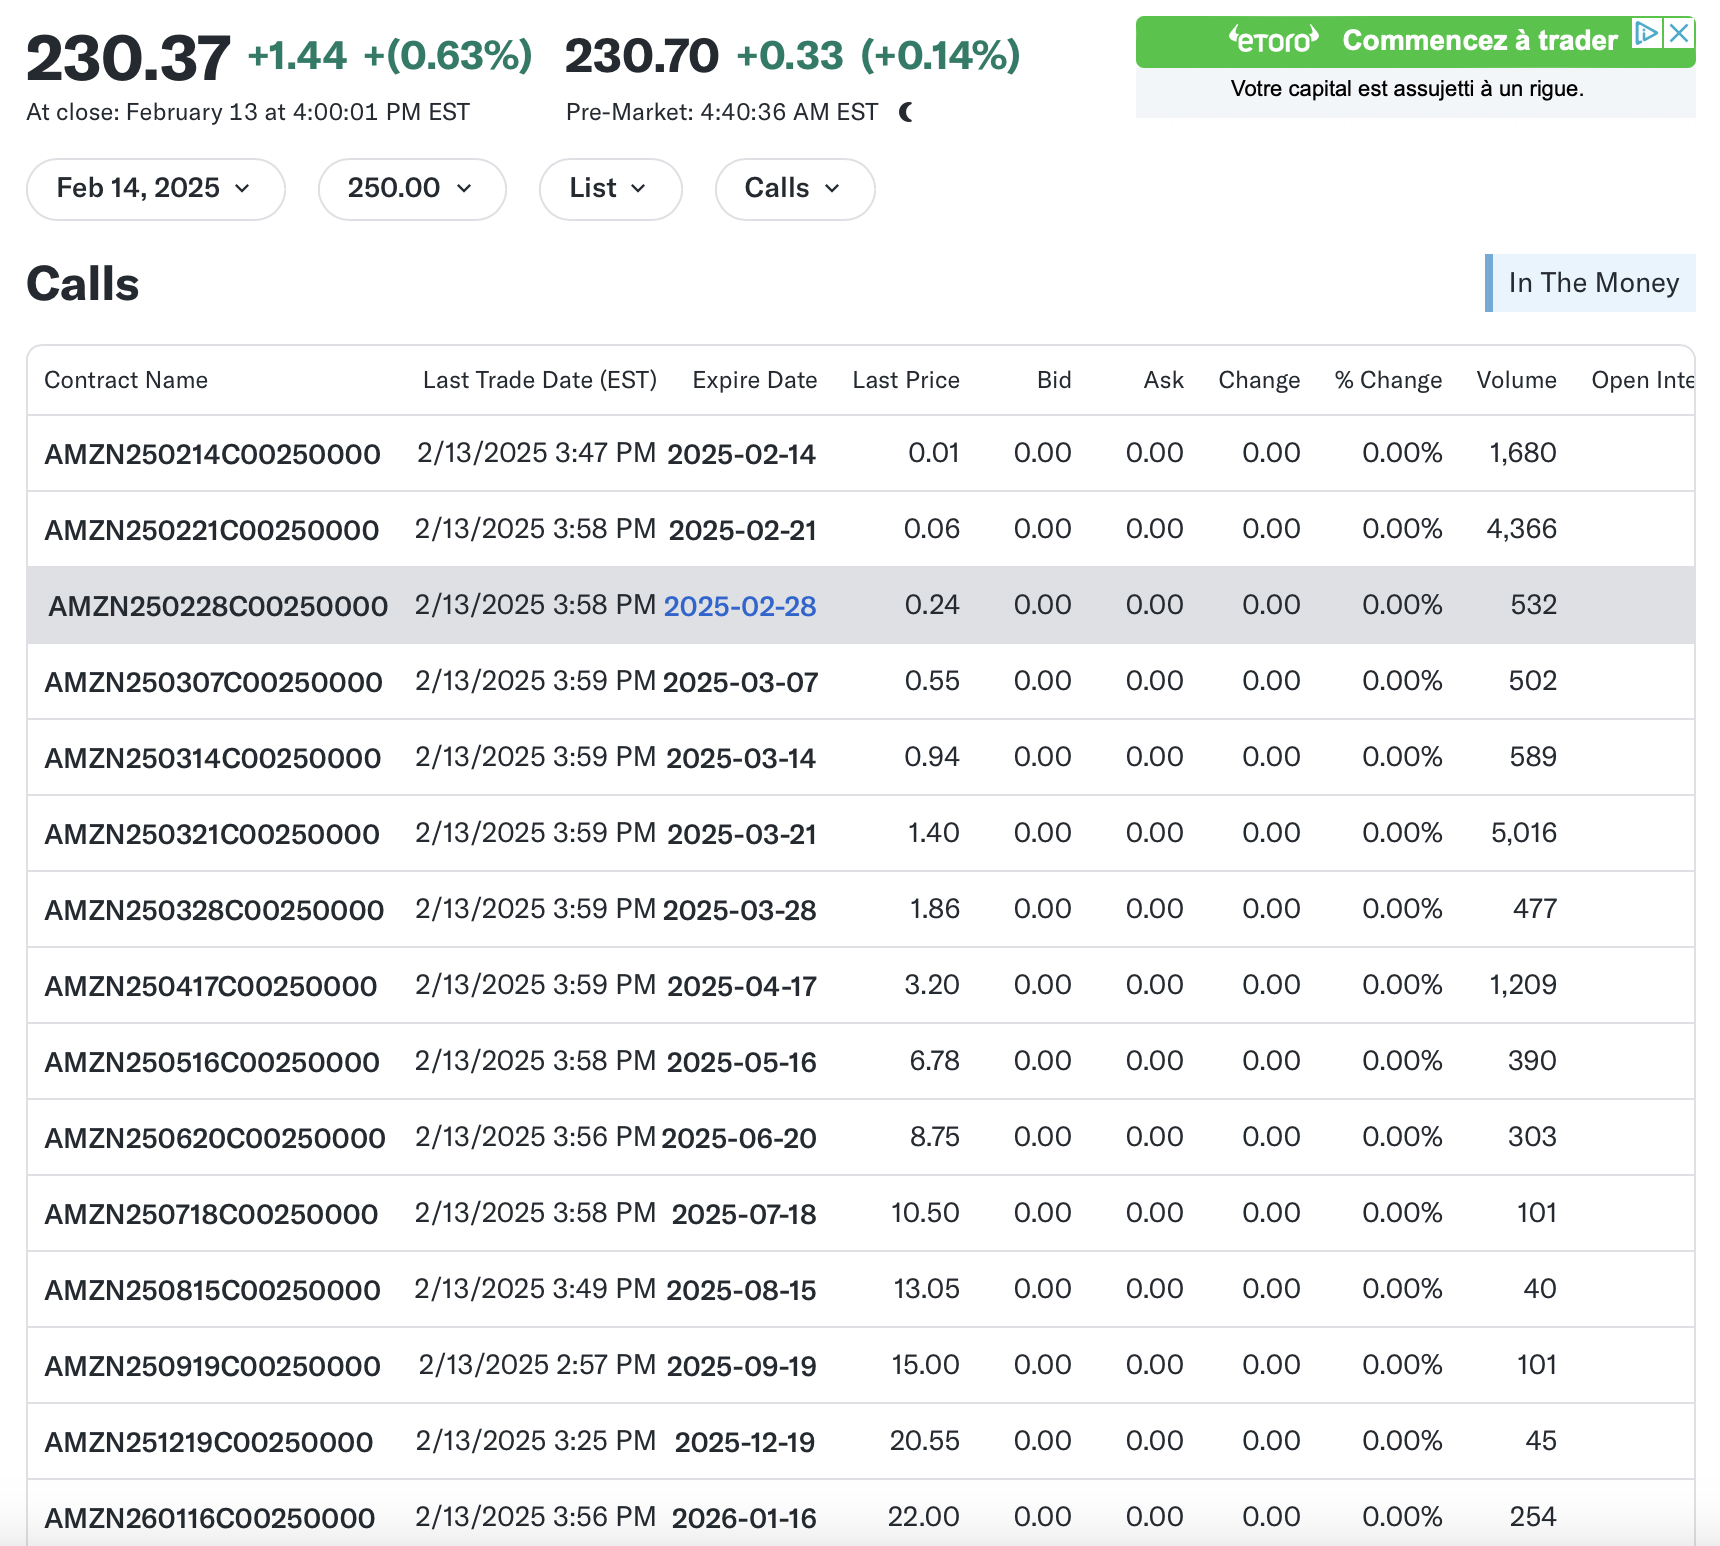

In [32]:
import numpy as np
import matplotlib.pyplot as plt
#Derivative parameters
S0 = 230.37                   #stock price
T = 0.9                       #Time to maturity in years
K = 250.00                    #strike price
sigma = 0.2985                #implied volatility (%)
r = 0.03                      #risk-free rate (%)
num_simulations = 10000       # Number of simulations
num_steps = 240               # Number of time steps (trading days in a year)
market_value = 22.00          #market price of option

In [33]:
# Simulate stock price paths
dt = T / num_steps
S = np.zeros((num_simulations, num_steps + 1))
S[:, 0] = S0
# Calculate the pricing using GBM
for t in range(1, num_steps + 1):
    Z = np.random.standard_normal(num_simulations)
    S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

In [34]:
# Calculate the payoff for each path
payoff = np.maximum(S[:, -1] - K, 0)

In [35]:
# Discount the average payoff to present value
call_option_price = np.exp(-r * T) * np.mean(payoff)
print(f"Estimated Call Option Price: {call_option_price:.2f}")

Estimated Call Option Price: 20.90


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


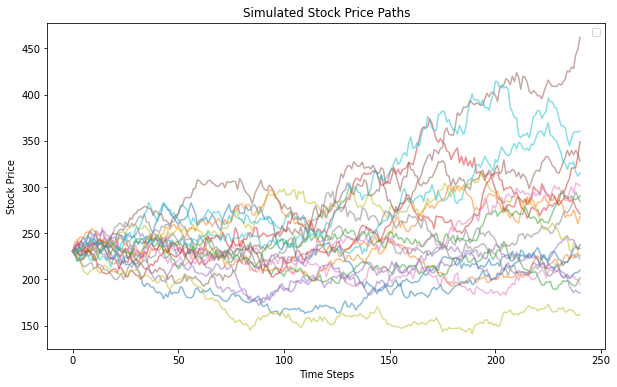

In [36]:
# Plot some of the simulated paths and
plt.figure(figsize=(10, 6))
plt.plot(S.T[:, :20], alpha=0.5)  # Plot the first 20 paths
plt.title('Simulated Stock Price Paths')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### From Monte Carlo simulation, we can coclude that the option pricing is estimated to be 20.90 as supposed to the stated price of 22.00








# For the Second part, we will utilise Black-Scholes formula, under the assumption that AMZN follows an European Call option pricing

### The formula is

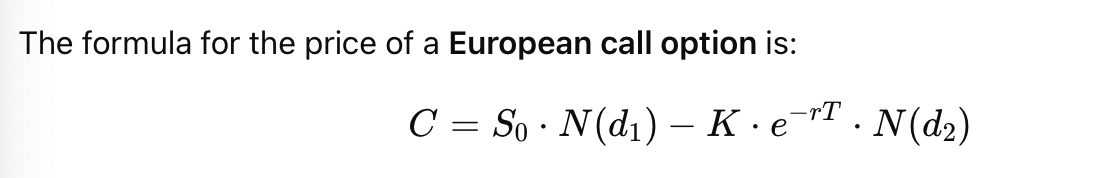

In [31]:
import numpy as np
from scipy.stats import norm

# Black-Scholes formula for European Call Option
def black_scholes_call(S0, K, T, r, sigma):
    # Calculate d1 and d2
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Call option price
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Parameters
S0 = 230.37                   #stock price
T = 0.9                       #Time to maturity in years
K = 250.00                    #strike price
sigma = 0.2985                #implied volatility (%)
r = 0.03                      #risk-free rate (%)

# Calculate the option price
call_option_price = black_scholes_call(S0, K, T, r, sigma)

print(f"European Call Option Price: {call_option_price:.2f}")


European Call Option Price: 20.68


### From Black-Scholes formula, we can coclude that the option pricing is estimated to be 20.68 as supposed to the stated price of 22.00